<a href="https://colab.research.google.com/github/almeida-cma/SI_Tema5/blob/main/T5_1_backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8600 - loss: 0.4811
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9538 - loss: 0.1569
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9679 - loss: 0.1074
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9735 - loss: 0.0872
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9771 - loss: 0.0724
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9705 - loss: 0.0918
Precisão no conjunto de teste: 0.9740999937057495
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


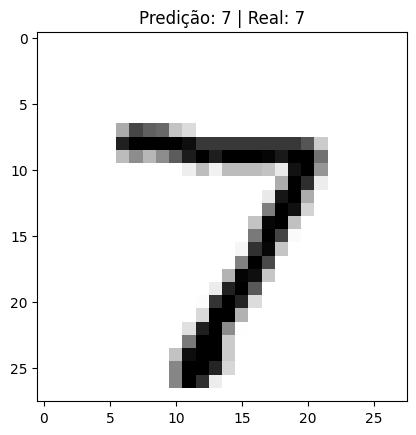

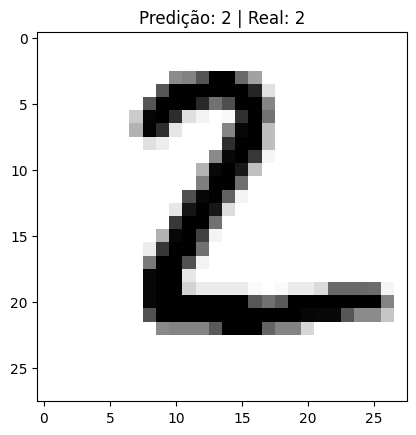

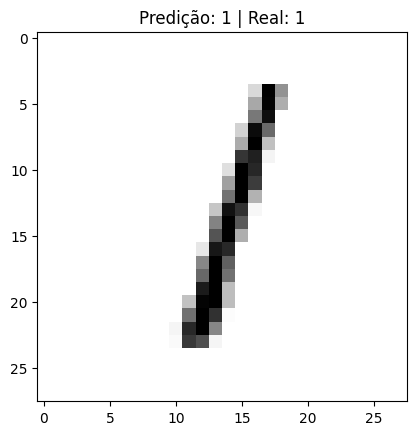

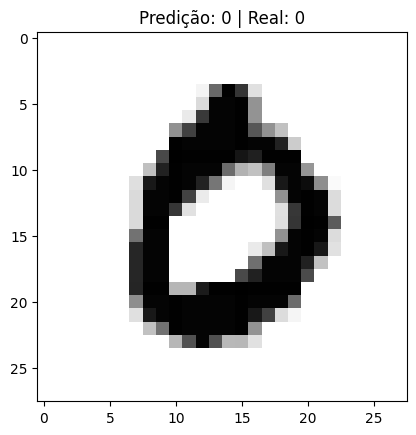

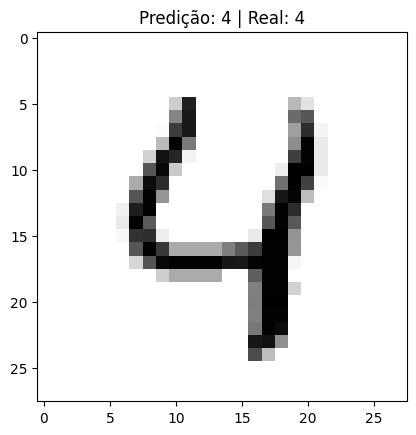

In [ ]:
# Importando bibliotecas necessárias
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Carregando o conjunto de dados MNIST
mnist = tf.keras.datasets.mnist

# Dividindo em treinamento e teste
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalizando as imagens (colocando valores entre 0 e 1)
train_images = train_images / 255.0
test_images = test_images / 255.0

# Construindo o modelo da rede neural
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Transformar a imagem de 28x28 em uma lista de 784 pixels
    layers.Dense(128, activation='relu'),  # Camada densa com 128 neurônios
    layers.Dropout(0.2),  # Camada de dropout para evitar overfitting
    layers.Dense(10)  # Camada de saída com 10 neurônios (um para cada número de 0 a 9)
])

# Compilando o modelo
model.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Treinando o modelo
model.fit(train_images, train_labels, epochs=5)

# Avaliando o modelo no conjunto de teste
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f"Precisão no conjunto de teste: {test_acc}")

# Exibindo algumas imagens do conjunto de teste e suas previsões
predictions = model.predict(test_images)

for i in range(5):
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.title(f"Predição: {predictions[i].argmax()} | Real: {test_labels[i]}")
    plt.show()
